This script assumes the following preliminary steps were taken:
1. The iris.zip file was downloaded from https://archive.ics.uci.edu/dataset/53/iris and placed in the `data/raw/` folder
2. The iris.zip compressed file was extracted. Now you should have `/data/raw/iris/` which contains a few files such as Index, iris.data, iris.names, etc.

In [13]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import sklearn

In [8]:
df = pd.read_csv(
    '../data/raw/iris/iris.data', 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


There are 150 instances, 4 features, and 1 target

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

The features are already floats, so no changes are needed there. We will need to do something with the target variable.

In [11]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

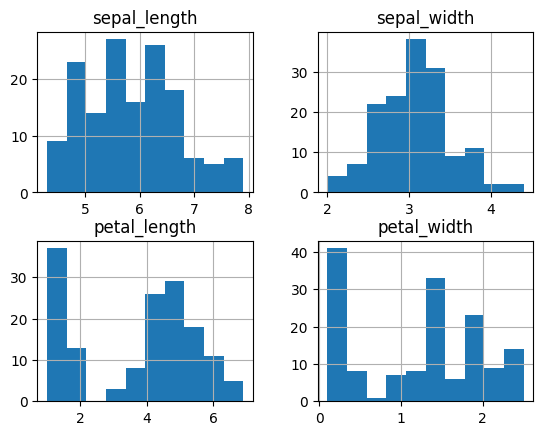

In [14]:
df.hist()

<Axes: >

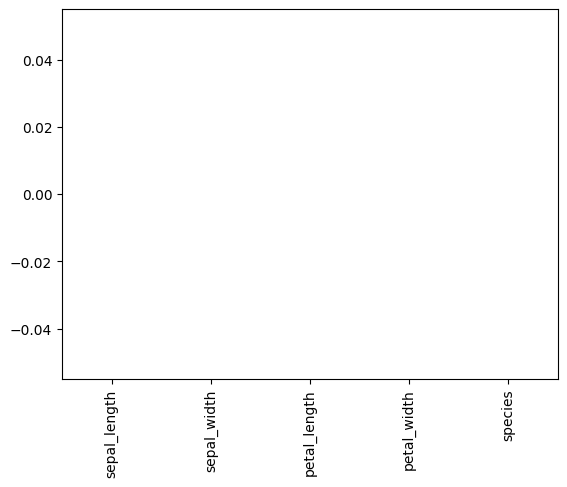

In [16]:
df.isnull().sum().plot(kind='bar')

The data contains no missing values. So for training all we need to handle is conversion of the categorical string target variable to a numeric.